Missing data train set:
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
Missing data test set:
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64
Titles:
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int

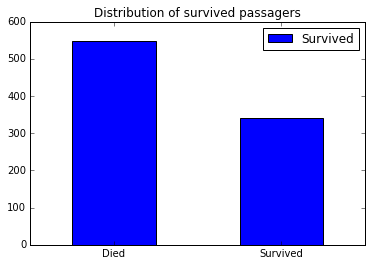

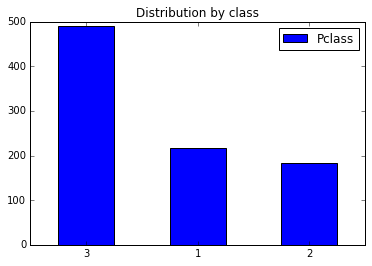

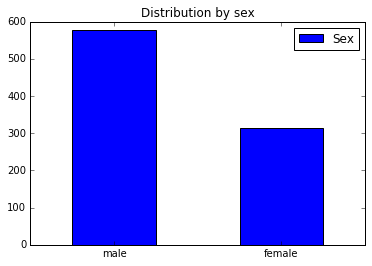

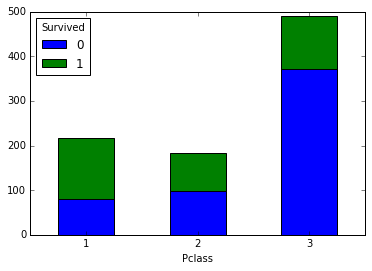

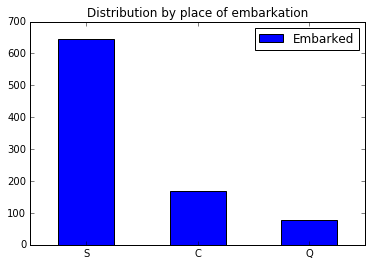

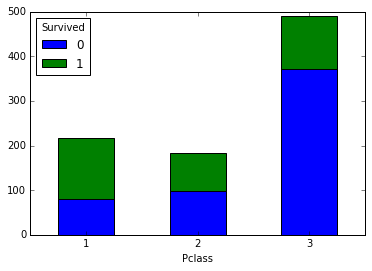

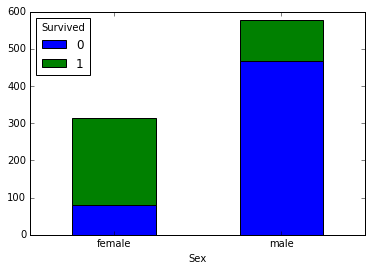

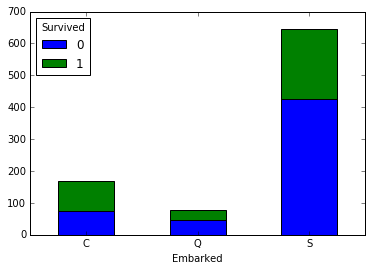

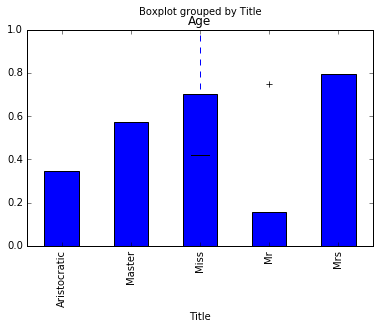

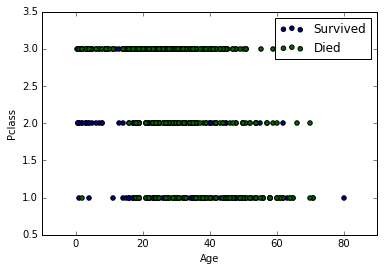

In [2]:
import init
reload(init)
from init import * 

In [3]:
from sklearn.metrics import classification_report as class_report

In [4]:
data_train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked', u'Title',
       u'TitleCat', u'PclassCat', u'IsCabin', u'LastName',
       u'RelativeSurvived'],
      dtype='object')

In [5]:
def add_sex_cat(data):
    # all are man
    data["SexCat"] = 0
    data.ix[data.Sex == "female", "SexCat"] = 1
    
    
add_sex_cat(data_train)
add_sex_cat(data_test)

In [6]:
def add_embarked_cat(data):
    data["EmbarkedCat"] = 0
    data.ix[data.Embarked == "C", "EmbarkedCat"] = 1
    data.ix[data.Embarked == "Q", "EmbarkedCat"] = 2

add_embarked_cat(data_train)
add_embarked_cat(data_test)

In [7]:
# lets add IsFamily column
def add_is_family(data):
    data['Family'] = data.SibSp + data.Parch
    data['IsFamily'] = 0
    data.ix[data.SibSp + data.Parch > 0, 'IsFamily'] = 1
    
    
add_is_family(data_train)
add_is_family(data_test)

In [8]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,TitleCat,PclassCat,IsCabin,LastName,RelativeSurvived,SexCat,EmbarkedCat,Family,IsFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,Mr,3,3,0,Braund,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,Mrs,4,1,1,Cumings,1,1,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,Miss,2,3,0,Heikkinen,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,Mrs,4,1,1,Futrelle,1,1,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,Mr,3,3,0,Allen,1,0,0,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder


# fill-in cabin letter use '0' if no cabin letter present
def add_cabin_letter(data):
    s = data['Cabin'].notnull()
    data['CabinLetter'] = '0'
    data['CabinNumber'] = '0'
    
    data.ix[s, 'CabinLetter'] = data[s].Cabin.str.extract("([a-zA-Z ]+).*")
    data.ix[data.CabinLetter >= 'F', 'CabinLetter'] = 'F'
    #data.ix[data.CabinLetter >= 'D', 'CabinLetter'] = 'D'
    
    data.ix[s, 'CabinNumber'] = data[s].Cabin.str.extract("[a-zA-Z].*?(\d+)")
    data.CabinNumber.fillna('0', inplace=True)
    data.CabinNumber = data.CabinNumber.astype(int)
    
    enc = LabelEncoder()
    enc.fit(data.CabinLetter)
    # do we really need this???
    data['CabinLetterCat'] = enc.transform(data.CabinLetter) 
    data['CabinLetterNum'] = data.CabinLetterCat
    
    # combine number and letter of cabin
    #data['CabinLetNumComb'] = data['CabinLetterCat'] .map('${:,.2f}'.format)
    
    
add_cabin_letter(data_train)
add_cabin_letter(data_test)


#print data_train.groupby(["CabinLetter", "Sex", "Survived"]).size()
#p = data_train.sort_values(by='CabinNumber').groupby(["CabinNumber", "Sex", "Survived"]).size()
#print p

data_all['TicketType'] = data_all.Ticket.str.extract("(.*) \d+")
data_all['TicketType'].fillna('0', inplace=True)

data_train['TicketType'] = data_train.Ticket.str.extract("(.*) \d+")
data_train['TicketType'].fillna('0', inplace=True)

with pd.option_context('display.max_rows', 10000, 'display.max_columns', 3):
    p_0 = data_all.groupby(['TicketType', 'Survived']).size()
    p_1 = data_train.groupby(['TicketType', 'Survived']).size()
    print pd.concat([p_0, p_1], axis=1)

data_train.groupby(["Ticket"]).size()

# lets try to extract last digits
data_train['TicketType'] = data_train.Ticket.str.extract("(.*) \d+")
data_train['TicketType'].fillna('0', inplace=True)

data_train['TicketTypeFirstLetter'] = data_train.TicketType.str[0]

#print data_train.groupby(['TicketTypeFirstLetter', 'Sex', 'Survived']).size()
#df['Date'] = df['Date'].apply(lambda x: int(str(x)[-4:]))

# need fcking graph here

# lets take a look at ticket numbers where there are only ticket numbers... nothing else


yo = data_train.groupby(['CabinLetter', 'Survived']).size()
#yo = yo.unstack()
#yo.fillna(0, inplace=True)
#print yo

['0' 'A' 'B' 'C' 'D' 'E' 'F']
['0' 'A' 'B' 'C' 'D' 'E' 'F']
                        0    1
TicketType  Survived          
0           0         410  410
            1         255  255
A./5.       0           2    2
A.5.        0           2    2
A/4         0           3    3
A/4.        0           3    3
A/5         0           9    9
            1           1    1
A/5.        0           6    6
            1           1    1
A/S         0           1    1
A4.         0           1    1
C           0           3    3
            1           2    2
C.A.        0          14   14
            1          13   13
C.A./SOTON  0           1    1
CA          0           6    6
CA.         0           7    7
            1           1    1
F.C.        0           1    1
F.C.C.      0           1    1
            1           4    4
Fa          0           1    1
P/PP        0           1    1
            1           1    1
PC          0          21   21
            1          39   39
PP        

In [10]:
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RandForest 


print metrics.SCORERS.keys()

['f1', 'f1_weighted', 'f1_samples', 'recall_samples', 'recall_micro', 'adjusted_rand_score', 'recall_macro', 'mean_absolute_error', 'precision_macro', 'precision_weighted', 'f1_macro', 'recall_weighted', 'accuracy', 'precision_samples', 'median_absolute_error', 'precision', 'log_loss', 'precision_micro', 'average_precision', 'roc_auc', 'r2', 'recall', 'mean_squared_error', 'f1_micro']


In [11]:
print data_train.TitleCat.max() + 1
print len(data_train.Pclass.value_counts())
print len(data_train.SexCat.value_counts())

5
3
2


In [12]:
# lets see what we can do with the ticket

In [13]:
# don't need IsFamily as Family exists
# after adding title logic reg became worth. random tree becomes better
all_cols = ["TitleCat", "Pclass", "SexCat", "Age", "Fare", "EmbarkedCat", 
            "SibSp", "Parch", 'Family', 'IsFamily', "CabinLetterCat", "CabinLetterNum", 'CabinNumber']#, 'RelativeSurvived'] #, 'TicketTypeFirstLetter']

# def transform_data(data, cols=all_cols):
#     mat = np.matrix(data[cols], dtype=np.float64)
#     cat_fs = []
#     for i, c in enumerate(cols):
#         if (c == 'Pclass' or c == 'EmbarkedCat' or c == 'TitleCat' 
#             or c == 'CabinLetterCat' or c == 'TicketTypeFirstLetter'):
#             category_features.append(i)
#     enc = OneHotEncoder(categorical_features=cat_fs)
#     enc.fit(mat)
#     return enc.transform(mat, )
    
# cols : list of columns
def prepare_matrices(cols=all_cols):
    # sex is binary
    mat_train = np.matrix(data_train[cols], dtype=np.float64)
    mat_test = np.matrix(data_test[cols], dtype=np.float64)

    category_features = []
    # cabin should not be category as it's more like numeric
    for i, c in enumerate(cols):
        if (c == 'Pclass' or c == 'EmbarkedCat' or c == 'TitleCat' 
            or c == 'CabinLetterCat' or c == 'TicketTypeFirstLetter'):
            category_features.append(i)
    enc = OneHotEncoder(categorical_features=category_features, sparse=False)
    enc.fit(mat_train)
    return tuple(map(enc.transform, [mat_train, mat_test]))

In [14]:
data_train[['Survived'] + all_cols].corr()

KeyError: "['CabinLetterNumCabinNumber'] not in index"

In [ ]:
# big Pclass, IsCabin;

# we have to do feature selection

"""
# lets find out what important features we have here
from sklearn.feature_selection import SelectKBest, f_classif


tt, mission = prepare_matrices()
print tt.toarray()[0,:]
print mission.toarray()[0,:]
selector = SelectKBest(f_classif, k=5)
selector.fit(tt, data_train.Survived)
scores = -np.log10(selector.pvalues_)

print scores
#plt.xticks(range(len(predictors)), predictors, rotation='vertical')
"""